In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from collections import deque
from IPython.core.display import Image, display, HTML
from graphviz import Digraph

In [14]:
opt = Options()
opt.headless = True
b = webdriver.Chrome(options=opt)

In [15]:
b.set_window_size(300, 200)

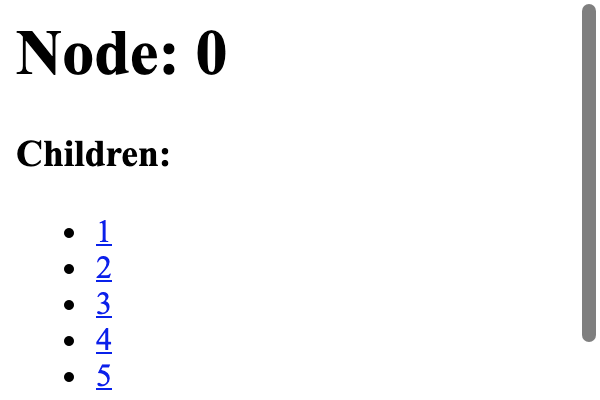

['https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/practice5/1.html',
 'https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/practice5/2.html',
 'https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/practice5/3.html',
 'https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/practice5/4.html',
 'https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/practice5/5.html',
 'https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/practice5/6.html']

In [16]:
def download(url):
    b.get(url)
    b.save_screenshot("tmp.png")
    display(Image("tmp.png"))
    next_pages = []
    for a in b.find_elements_by_tag_name("a"):
        next_pages.append(a.get_attribute("href"))
    return next_pages

download("https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/practice5/0.html")

In [17]:
todo = deque(["https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/practice7/1.html"])
added = set(todo)

g = Digraph(engine='neato')

def node_name(url):
    return url.split("/")[-1].split(".")[0]

def visit():
    assert len(todo) > 0
    url = todo.popleft()
    next_pages = download(url)
    for next_url in next_pages:
        g.edge(node_name(url), node_name(next_url), len="1.3")
        if not next_url in added:
            todo.append(next_url)
            added.add(next_url)
    display(g)
    print("TODO:", todo)

In [18]:
#while todo:
#    visit()

In [19]:
from urllib.robotparser import RobotFileParser
robo = RobotFileParser("https://news.ycombinator.com/robots.txt")
robo.read()
robo.crawl_delay(useragent="320-agent")

30

In [20]:
from urllib.robotparser import RobotFileParser
robo = RobotFileParser("https://tyler.caraza-harter.com/robots.txt")
robo.read()
base = "https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/calendar/"
print(robo.can_fetch("320-agent", base+"A.html"))
print(robo.can_fetch("320-agent", base+"months/JAN-2020.html"))

True
False


In [21]:
todo = deque(["https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/calendar/A.html"])
added = set(todo)

g = Digraph(engine='neato')

def node_name(url):
    return url.split("/")[-1].split(".")[0]

def visit():
    assert len(todo) > 0
    url = todo.popleft()
    next_pages = download(url)
    for next_url in next_pages:
        g.edge(node_name(url), node_name(next_url), len="1.3")
        if not next_url in added:
            if robo.can_fetch("320-agent", next_url):
                todo.append(next_url)
                added.add(next_url)
    display(g)
    print("TODO:", todo)

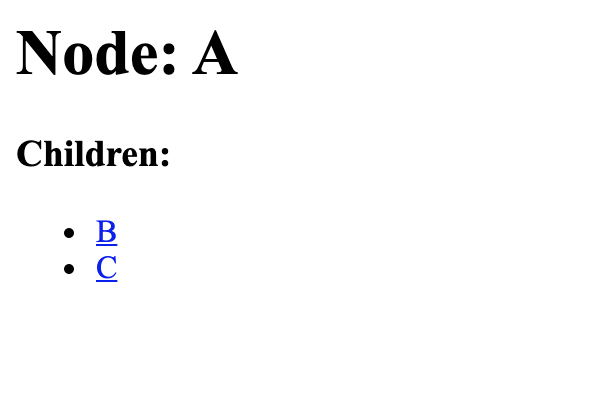

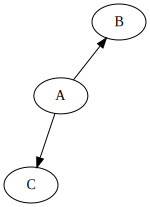

TODO: deque(['https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/calendar/B.html', 'https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/calendar/C.html'])


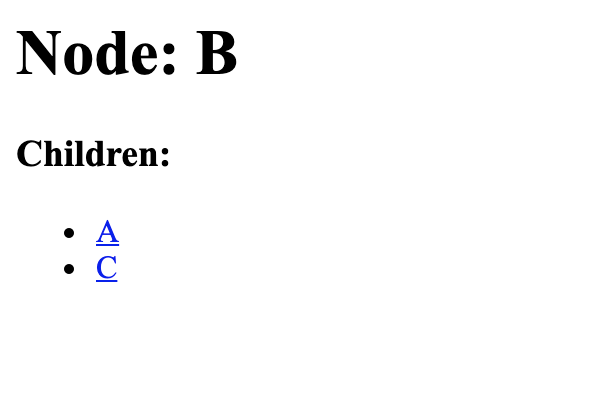

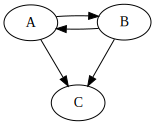

TODO: deque(['https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/calendar/C.html'])


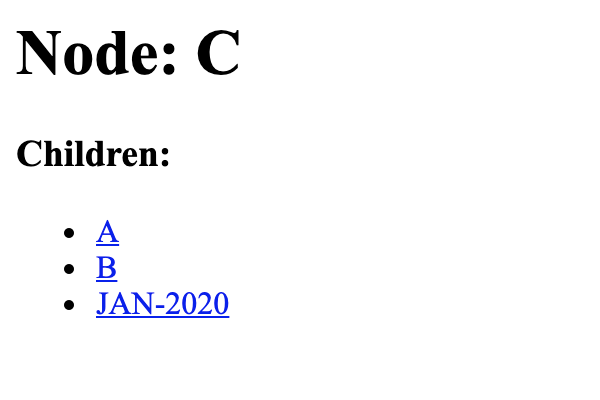

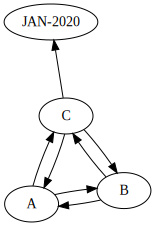

TODO: deque([])


In [22]:
while todo:
    visit()